      POLYNOMIAL REGRESSION - SALARY PREDICTION     

================ DATASET LOADED ================

+----+--------------+----------+
|    |   Experience |   Salary |
+====+==============+==========+
|  0 |            1 |    45000 |
+----+--------------+----------+
|  1 |            2 |    50000 |
+----+--------------+----------+
|  2 |            3 |    60000 |
+----+--------------+----------+
|  3 |            4 |    65000 |
+----+--------------+----------+
|  4 |            5 |    70000 |
+----+--------------+----------+
|  5 |            6 |    85000 |
+----+--------------+----------+
|  6 |            7 |    90000 |
+----+--------------+----------+
|  7 |            8 |   110000 |
+----+--------------+----------+
|  8 |            9 |   130000 |
+----+--------------+----------+
|  9 |           10 |   150000 |
+----+--------------+----------+

Dataset Shape (ASCII):
Rows: 10, Columns: 2

================ MODEL TRAINED ==================

╒═══════════════╤═══════════╕
│ Term    

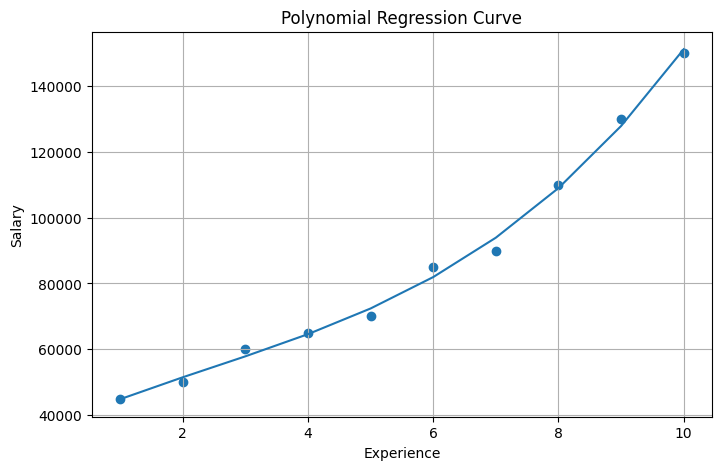

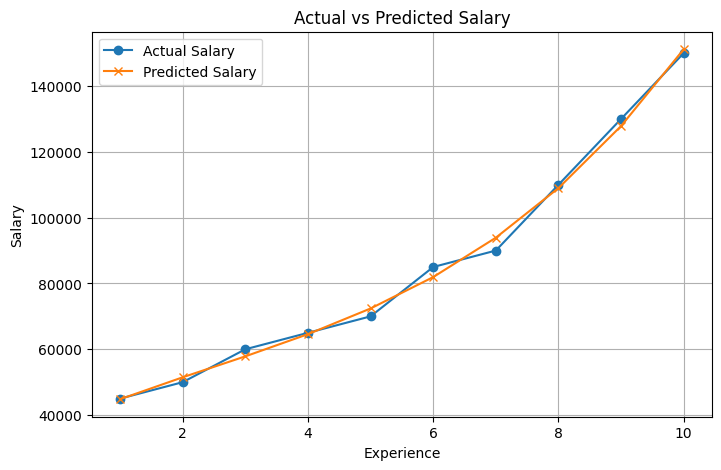

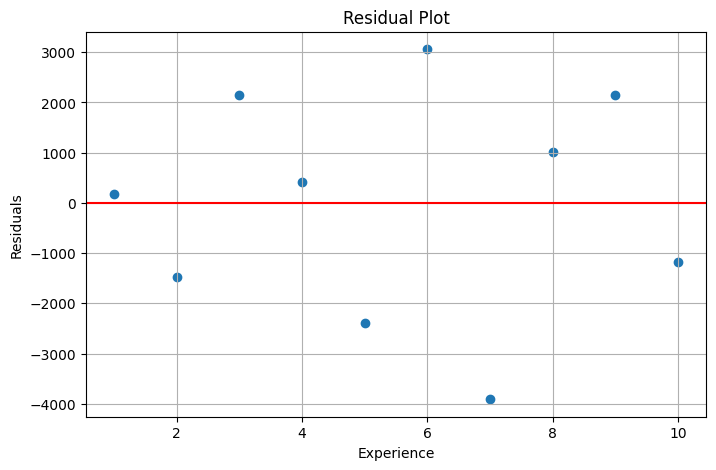

In [5]:
# ------------------------------------------------------------
# 0. Import Libraries
# ------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate   # For ASCII Tables

print("====================================================")
print("      POLYNOMIAL REGRESSION - SALARY PREDICTION     ")
print("====================================================")

# ------------------------------------------------------------
# 1. Load Dataset From Drive
# ------------------------------------------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/ML(extra)/Regression/salary_experience_dataset.csv"
df = pd.read_csv(file_path)

print("\n================ DATASET LOADED ================\n")
print(tabulate(df, headers="keys", tablefmt="grid"))

# ASCII shape
print("\nDataset Shape (ASCII):")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# ------------------------------------------------------------
# 2. Split Data
# ------------------------------------------------------------
X = df[['Experience']].values
Y = df['Salary'].values

# ------------------------------------------------------------
# 3. Polynomial Features
# ------------------------------------------------------------
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# ------------------------------------------------------------
# 4. Train Model
# ------------------------------------------------------------
model = LinearRegression()
model.fit(X_poly, Y)

print("\n================ MODEL TRAINED ==================\n")

# ASCII Coefficients
coef_table = [
    ["Intercept", model.intercept_],
    ["Coefficient 1", model.coef_[1]],
    ["Coefficient 2", model.coef_[2]],
    ["Coefficient 3", model.coef_[3]]
]
print(tabulate(coef_table, headers=["Term", "Value"], tablefmt="fancy_grid"))

# ------------------------------------------------------------
# 5. Predictions
# ------------------------------------------------------------
Y_pred = model.predict(X_poly)

# ASCII Prediction Output Table
prediction_table = []
for exp, actual, pred in zip(X.flatten(), Y, Y_pred):
    prediction_table.append([exp, actual, int(pred)])

print("\n================ PREDICTION TABLE ================\n")
print(tabulate(prediction_table, headers=["Experience", "Actual Salary", "Predicted Salary"], tablefmt="grid"))

# ------------------------------------------------------------
# 6. Model Accuracy
# ------------------------------------------------------------
mae = mean_absolute_error(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

metrics = [
    ["Mean Absolute Error (MAE)", mae],
    ["Mean Squared Error (MSE)", mse],
    ["R-Squared Score", r2]
]

print("\n================ MODEL METRICS (ASCII) ================\n")
print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="fancy_grid"))

# ASCII bar for R-Square
print("\nASCII Model Accuracy Bar:")
bar_length = int(r2 * 50)
print("[" + "#" * bar_length + "-" * (50 - bar_length) + f"]  ({r2*100:.2f}% accuracy)")

# ------------------------------------------------------------
# 7. User Input Prediction
# ------------------------------------------------------------
print("\n================ USER INPUT PREDICTION ================\n")
user_exp = float(input("Enter experience in years: "))

user_poly = poly.transform([[user_exp]])
user_pred = model.predict(user_poly)[0]

print("\n============== ASCII OUTPUT ==============")
print(f"Experience Entered: {user_exp}")
print(f"Predicted Salary : ₹{int(user_pred)}")
print("==========================================")

# ------------------------------------------------------------
# 8. Visualization 1 – Polynomial Curve
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.title("Polynomial Regression Curve")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.grid()
plt.show()

# ------------------------------------------------------------
# 9. Visualization 2 – Actual vs Predicted Comparison
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(X, Y, marker='o', label='Actual Salary')
plt.plot(X, Y_pred, marker='x', label='Predicted Salary')
plt.title("Actual vs Predicted Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()

# ------------------------------------------------------------
# 10. Visualization 3 – Residual Plot
# ------------------------------------------------------------
residuals = Y - Y_pred

plt.figure(figsize=(8,5))
plt.scatter(X, residuals)
plt.axhline(y=0, color='r')
plt.title("Residual Plot")
plt.xlabel("Experience")
plt.ylabel("Residuals")
plt.grid()
plt.show()
